In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np

In [2]:
train_df=pd.read_csv("C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\GUIDE_Train.csv")
test_df=pd.read_csv("C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\GUIDE_Test.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930207 entries, 0 to 2930206
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               float64
 2   IncidentId          float64
 3   AlertId             float64
 4   Timestamp           object 
 5   DetectorId          float64
 6   AlertTitle          float64
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            float64
 15  Sha256              float64
 16  IpAddress           float64
 17  Url                 float64
 18  AccountSid          float64
 19  AccountUpn          float64
 20  AccountObjectId     float64
 21  AccountName         float64
 22  DeviceName          float64
 23  NetworkMessageId    float64
 24  EmailClusterId      floa

In [5]:
test_df.shape

(2930207, 46)

In [6]:
test_df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657.0,11767.0,87199.0,2024-06-04T22:56:27.000Z,524.0,563.0,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Private
1,1400159342154,3.0,91158.0,632273.0,2024-06-03T12:58:26.000Z,2.0,2.0,CommandAndControl,NaN,BenignPositive,...,NaN,0.0,0.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
2,1279900255923,145.0,32247.0,131719.0,2024-06-08T03:20:49.000Z,2932.0,10807.0,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5.0,66.0,NaN,Suspicious,Suspicious,242.0,1445.0,10630.0,Public
3,60129547292,222.0,15294.0,917686.0,2024-06-12T12:07:31.000Z,0.0,0.0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public
4,515396080539,363.0,7615.0,5944.0,2024-06-06T17:42:05.000Z,27.0,18.0,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5.0,66.0,NaN,NaN,NaN,242.0,1445.0,10630.0,Public


In [7]:
train_df.shape

(9516837, 45)

In [8]:
train_df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [9]:
train_df.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [10]:
test_df.isna().sum()

Id                          0
OrgId                       1
IncidentId                  1
AlertId                     1
Timestamp                   1
DetectorId                  1
AlertTitle                  1
Category                    1
MitreTechniques       1630051
IncidentGrade               1
ActionGrouped         2928837
ActionGranular        2928837
EntityType                  1
EvidenceRole                1
DeviceId                    1
Sha256                      1
IpAddress                   1
Url                         1
AccountSid                  1
AccountUpn                  1
AccountObjectId             1
AccountName                 1
DeviceName                  1
NetworkMessageId            1
EmailClusterId        2900763
RegistryKey                 1
RegistryValueName           1
RegistryValueData           1
ApplicationId               1
ApplicationName             1
OAuthApplicationId          1
ThreatFamily          2908058
FileName                    1
FolderPath

In [11]:
traindupicate_count=train_df.duplicated().sum()
traindupicate_count

np.int64(22559)

In [12]:
testduplicate_count=test_df.duplicated().sum()
testduplicate_count

np.int64(57)

In [13]:
#Taget Variable Distribution
train_df["IncidentGrade"].value_counts()

IncidentGrade
BenignPositive    4110817
TruePositive      3322713
FalsePositive     2031967
Name: count, dtype: int64

Data Cleaning and Preprocessing for Train Dataset

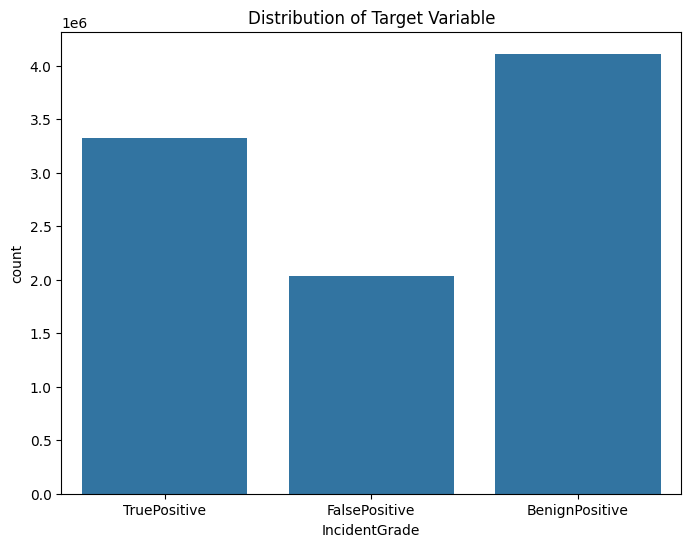

In [14]:
#plot distribution of Traget Variable
plt.figure(figsize=(8,6))
sns.countplot(x=train_df["IncidentGrade"])
plt.title("Distribution of Target Variable")
plt.show()

In [15]:
#Drop 50% Missing Value

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Calculate the percentage of missing values for each column
missing_percentage = train_df.isnull().sum() / len(train_df) * 100

# Display the percentage of missing values
print("Percentage of missing values for each column:")
print(missing_percentage)

# List columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
print("\nColumns with more than 50% missing values will be dropped:")
print(columns_to_drop)

# Drop these columns from the DataFrame
train_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm the result
print("\nColumns remaining after dropping:")
print(train_df.columns)


Percentage of missing values for each column:
Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.460120
IncidentGrade          0.539465
ActionGrouped         99.410897
ActionGranular        99.410897
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.982729
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.0

In [16]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

# Impute missing values for categorical columns
categorical_columns = train_df.select_dtypes(include=['object','category']).columns
for col in categorical_columns:
    if train_df[col].isnull().any():
        mode_val = train_df[col].mode()[0]
        train_df[col] = train_df[col].fillna(mode_val)
        print(f"Imputed categorical column '{col}' with mode value: {mode_val}")

Imputed categorical column 'IncidentGrade' with mode value: BenignPositive


In [17]:
#impute Missing Values for Numerical columns

numerical_columns=train_df.select_dtypes(include=['int64','float64']).columns
for col in numerical_columns:
    if train_df[col].isnull().any():
        median_val=train_df[col].median()
        train_df[col]=train_df[col].fillna(median_val)
        print(f"Imputed numerical column '{col}' with median value:{median_val}" )

In [18]:
#Interquartile Range (IQR) method

def outliers(train_df, iqr_multiplier=1.5):  # Ensure 'iqr_multiplier' is a parameter
    numeric_features = train_df.select_dtypes(include=['int32', 'int16', 'float32', 'int64', 'float64'])
    for col in numeric_features.columns:
        if train_df[col].nunique() > 10:
            Q1 = numeric_features[col].quantile(0.25)
            Q3 = numeric_features[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR   
            train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    return train_df

# Usage
train_df = outliers(train_df, iqr_multiplier=1.5)


In [19]:
#Feature Engineering
train_df["Timestamp"]= pd.to_datetime(train_df['Timestamp'], errors='coerce')
train_df["Year"]=train_df["Timestamp"].dt.year
train_df["Month"]=train_df["Timestamp"].dt.month
train_df["DayOfWeek"]=train_df["Timestamp"].dt.dayofweek
train_df["Hour"]=train_df["Timestamp"].dt.hour

#Drop the "Timestamp" column
train_df.drop(columns=["Timestamp"], inplace=True)

In [20]:
train_df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'DayOfWeek', 'Hour'],
      dtype='object')

In [21]:
id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 
              'DeviceName', 'NetworkMessageId',  'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName','OSFamily', 'OSVersion', 'City','CountryCode', 'State']

# Exclude ID columns from scaling
numeric_features = train_df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).drop(columns=id_columns, errors='ignore')

# Scaling numerical features 
scaler = MinMaxScaler()
train_df[numeric_features.columns] = scaler.fit_transform(numeric_features)

In [23]:

# categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

for col in categorical_columns:
    if col in train_df.columns:
        train_df[col] = label_encoder.fit_transform(train_df[col].astype(str))  # Convert to string if necessary

In [24]:
# Remove duplicate rows
train_df.drop_duplicates(inplace=True)

In [25]:
# Save
path = r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\Cleaned_dataset\\Train_dataset.csv"
train_df.to_csv(path, index=False)
print("Data preprocessing complete and saved.")

Data preprocessing complete and saved.


In [31]:
test_df=pd.read_csv("C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\GUIDE_Test.csv")

In [32]:
# Check for duplicate rows
duplicate_count = test_df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)


Number of duplicate rows in the dataset: 57


In [33]:
# Target variable distribution
print("\nTarget variable distribution:")
print(test_df['IncidentGrade'].value_counts())


Target variable distribution:
IncidentGrade
BenignPositive    1238258
TruePositive      1054264
FalsePositive      637684
Name: count, dtype: int64


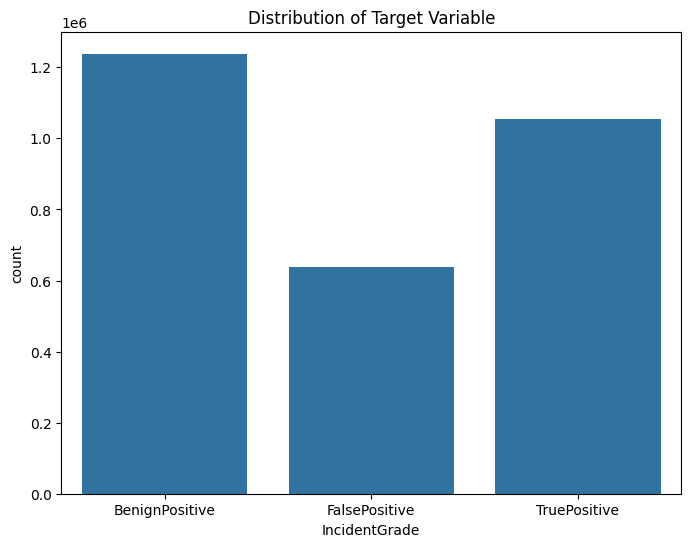

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x=test_df['IncidentGrade'])
plt.title('Distribution of Target Variable')
plt.show()

Data Cleaning and Preprocessing for Test Dataset

In [35]:
#Drop 50% Missing Value
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Calculate the percentage of missing values for each column
missing_percentage = test_df.isnull().sum() / len(test_df) * 100

# Display the percentage of missing values
print("Percentage of missing values for each column:")
print(missing_percentage)

# List columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
print("\nColumns with more than 50% missing values will be dropped:")
print(columns_to_drop)

# Drop these columns from the DataFrame
test_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm the result
print("\nColumns remaining after dropping:")
print(test_df.columns)

Percentage of missing values for each column:
Id                     0.000000
OrgId                  0.000034
IncidentId             0.000034
AlertId                0.000034
Timestamp              0.000034
DetectorId             0.000034
AlertTitle             0.000034
Category               0.000034
MitreTechniques       55.629210
IncidentGrade          0.000034
ActionGrouped         99.953246
ActionGranular        99.953246
EntityType             0.000034
EvidenceRole           0.000034
DeviceId               0.000034
Sha256                 0.000034
IpAddress              0.000034
Url                    0.000034
AccountSid             0.000034
AccountUpn             0.000034
AccountObjectId        0.000034
AccountName            0.000034
DeviceName             0.000034
NetworkMessageId       0.000034
EmailClusterId        98.995156
RegistryKey            0.000034
RegistryValueName      0.000034
RegistryValueData      0.000034
ApplicationId          0.000034
ApplicationName        0.0

In [36]:
# Impute missing values for numeric columns
numeric_columns = test_df.select_dtypes(include=['int64','float64']).columns
for col in numeric_columns:
    if test_df[col].isnull().any():
        median_val = test_df[col].median()
        test_df[col] = test_df[col].fillna(median_val)
        print(f"Imputed numeric column '{col}' with median value: {median_val}")

# Impute missing values for categorical columns
categorical_columns = test_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if test_df[col].isnull().any():
        mode_val = test_df[col].mode()[0]
        test_df[col] = test_df[col].fillna(mode_val)
        print(f"Imputed categorical column '{col}' with mode value: {mode_val}")

Imputed numeric column 'OrgId' with median value: 43.0
Imputed numeric column 'IncidentId' with median value: 8819.0
Imputed numeric column 'AlertId' with median value: 223178.0
Imputed numeric column 'DetectorId' with median value: 7.0
Imputed numeric column 'AlertTitle' with median value: 9.0
Imputed numeric column 'DeviceId' with median value: 98799.0
Imputed numeric column 'Sha256' with median value: 138268.0
Imputed numeric column 'IpAddress' with median value: 360606.0
Imputed numeric column 'Url' with median value: 160396.0
Imputed numeric column 'AccountSid' with median value: 441377.0
Imputed numeric column 'AccountUpn' with median value: 673934.0
Imputed numeric column 'AccountObjectId' with median value: 425863.0
Imputed numeric column 'AccountName' with median value: 453297.0
Imputed numeric column 'DeviceName' with median value: 153085.0
Imputed numeric column 'NetworkMessageId' with median value: 529644.0
Imputed numeric column 'RegistryKey' with median value: 1631.0
Impu

In [37]:
# Handling Outliers
def outliers(test_df, iqr_multiplier=1.5):
    numeric_features = test_df.select_dtypes(include=['int64','float64'])
    for col in numeric_features.columns:
        Q1 = numeric_features[col].quantile(0.25)
        Q3 = numeric_features[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
            
        test_df = test_df[(test_df[col] >= lower_bound) & (test_df[col] <= upper_bound)]
    return test_df

# Usage
test_df = outliers(test_df, iqr_multiplier=1.5)  # Adjusting the IQR multiplier if necessary

In [38]:
# Feature Engineering: Extracting datetime features
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'], errors='coerce')
test_df['Year'] = test_df['Timestamp'].dt.year
test_df['Month'] = test_df['Timestamp'].dt.month
test_df['DayOfWeek'] = test_df['Timestamp'].dt.dayofweek
test_df['Hour'] = test_df['Timestamp'].dt.hour

# Drop the 'Timestamp' and 'Usage'column
test_df.drop(columns=['Timestamp','Usage'], inplace=True)

In [39]:
test_df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'DayOfWeek', 'Hour'],
      dtype='object')

In [40]:
# Exclude ID columns from scaling
numeric_features = test_df.select_dtypes(include=['int32', 'int16', 'float32', 'int64','float64']).drop(columns=id_columns, errors='ignore')

In [41]:
# Scaling numerical features 
scaler = MinMaxScaler()
test_df[numeric_features.columns] = scaler.fit_transform(numeric_features)

# categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

for col in categorical_columns:
    if col in test_df.columns:
        test_df[col] = label_encoder.fit_transform(test_df[col].astype(str))  # Convert to string if necessary

In [42]:
# Remove duplicate rows
test_df.drop_duplicates(inplace=True)

In [43]:
# Save
path = r"C:\\Users\\prem\\Desktop\\Ranjana\\4.Classifying Cybersecurity\\Cleaned_dataset\\Test_dataset.csv"
test_df.to_csv(path, index=False)
print("Data preprocessing complete and saved.")

Data preprocessing complete and saved.
